#### PRN - 18030142043
## Project based on casestudy
## Course - Text Analytics
#### Name - Subodh Dharmadhikari
# SENTIMENTAL ANALYSIS on Amazon Product reviews dataset.The dataset file is added in this folder.

Importing all the required Libraries

In [1]:
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('amazon_reviews.csv')

In [3]:
d.to_csv('amazon_reviews.csv')

Function to calculate sentiments using Naive Bayes Analyzer

In [4]:
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

Function to calculate sentiments using Vader Sentiment Analyzer

In [5]:
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [6]:
Selected_Rows = dataset
Selected_Rows['Sentiment_Score']=Selected_Rows['Review_Text'].apply(lambda x: sentimental_Score(x))

Seperating negatives and positives into different dataframes for creating a 'Wordcloud'.

In [7]:
pos = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'pos']
neg = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'neg']

- Stemming function for stemming of different form of words which will be used by 'create_Word_Corpus()' function.
- PorterStemmer from nltk.stem is used for stemming.

In [8]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

In [9]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Summary"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Function plot_cloud() to plot cloud 

In [11]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

Generate a word cloud image of height=500 and width=900 for positives and negatives

In [12]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

Generating a WordCloud of 'Summary' section of Positive Reviews.

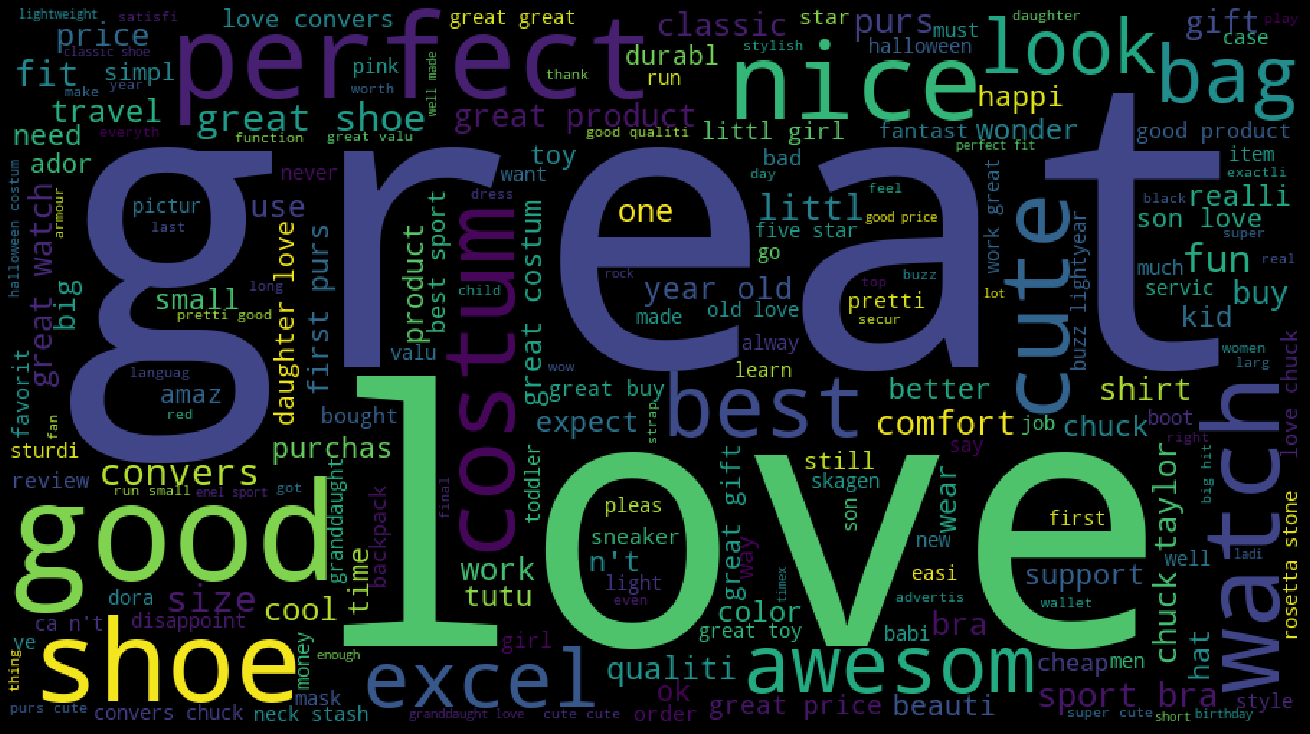

<Figure size 432x288 with 0 Axes>

In [13]:
plot_Cloud(pos_wordcloud)

Generating a WordCloud of 'Summary' section of Negative Reviews.

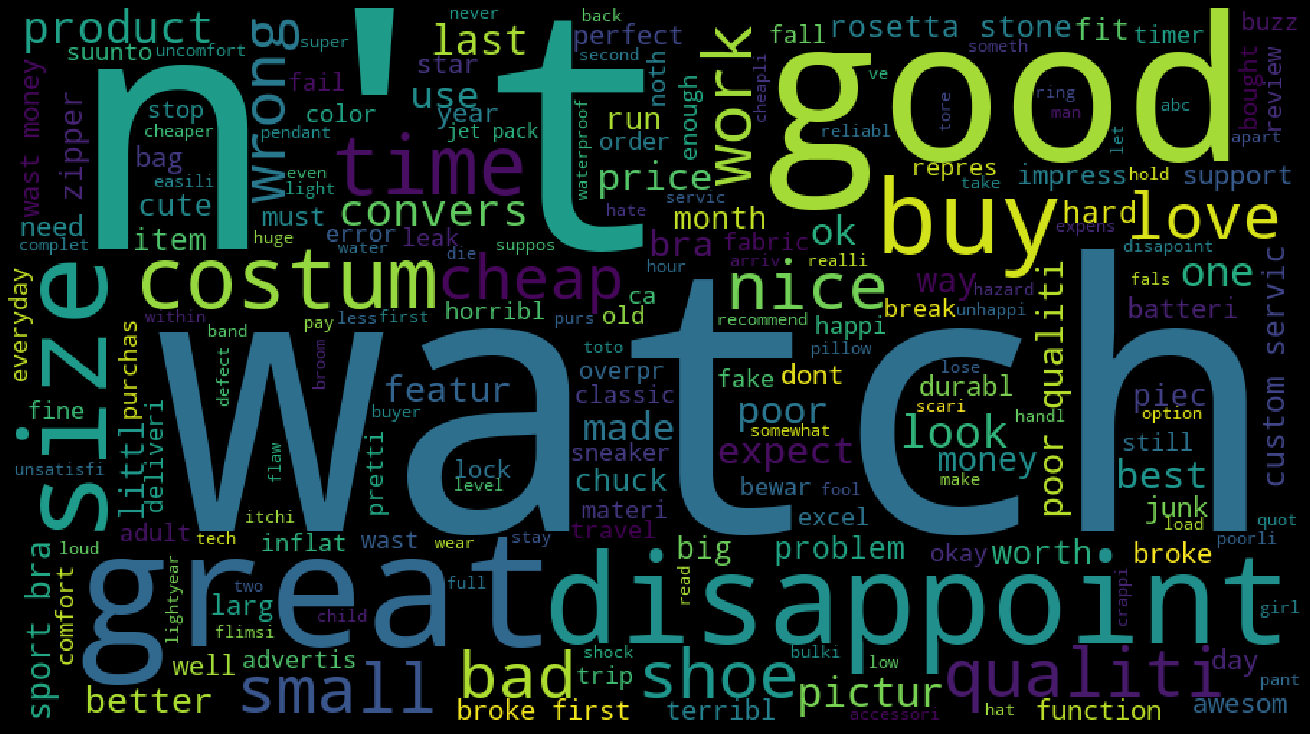

<Figure size 432x288 with 0 Axes>

In [14]:
plot_Cloud(neg_wordcloud)